In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# import warning
# warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
from datetime import datetime
#below is for VIF - Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

In [4]:
train = pd.read_csv('train_v9rqX0R.CSV')
test = pd.read_csv('test_AbJTz2l.CSV')
sample = pd.read_csv('sample_submission_8RXa3c6.CSV')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [8]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [9]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
train.Item_Identifier[:10]

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [14]:
train['source'] = 'train'
test['source'] = 'test'

In [15]:
train[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [16]:
df = pd.concat([train,test])
df[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [17]:
df.shape

(14204, 13)

In [18]:
df["Item_Identifier"].nunique()

1559

In [19]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5671,FDA01,15.00,reg,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
5672,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
5673,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5674,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5675,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
5680,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [20]:
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda x: x[0:3])

In [21]:
df['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [22]:
df['Item_Identifier_3'].value_counts()

FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [23]:
del df['Item_Identifier_3']

In [24]:
df.shape

(14204, 14)

In [25]:
df['Item_Weight'].isna().sum()

2439

In [26]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [27]:
#df['Item_Weight'] = df.groupby(['Item_Identifier_2']).Item_Weight.transform(lambda x : x.fillna(x.mean())) -> either . or [] in Item_Weight
df['Item_Weight'] = df.groupby(['Item_Identifier_2'])['Item_Weight'].transform(lambda x : x.fillna(x.mean()))

In [28]:
df['Item_Weight'].isna().sum()

0

In [29]:
df['Item_Fat_Content'].nunique()

5

In [30]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [32]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF" : "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"})

In [33]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

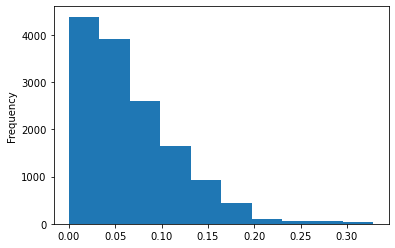

In [34]:
df['Item_Visibility'].plot(kind = 'hist')

In [35]:
df['Item_Visibility'].value_counts(ascending = False)

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [36]:
df.sort_values(by = ['Item_Identifier', 'Item_Visibility'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2
1197,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train,DR
1693,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train,DR
3912,DRA12,12.116645,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,DR
1245,DRA12,11.600000,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,train,DR
500,DRA12,11.600000,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,DR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.650000,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288,train,NC
1969,NCZ54,14.650000,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728,train,NC
7738,NCZ54,14.650000,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832,train,NC
4700,NCZ54,14.650000,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,NC


In [37]:
df.loc[df['Item_Visibility'] == 0.000000, 'Item_Visibility'] = np.NAN

In [38]:
df['Item_Visibility'].isna().sum()

879

In [39]:
df['Item_Visibility'] = df.groupby('Item_Identifier_2').Item_Visibility.transform(lambda x : x.fillna(x.mean()))

In [40]:
# df['Item_Visibility'].plot(kind = 'hist')

In [41]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [42]:
df['Item_Type'].nunique()

16

In [43]:
df['Item_Type'].isna().sum()

0

In [44]:
df['Item_MRP'].isna().sum()

0

<AxesSubplot:ylabel='Frequency'>

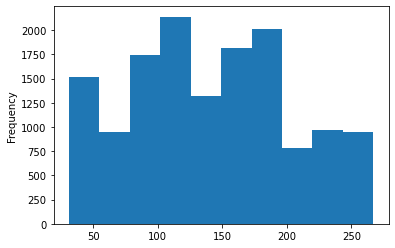

In [45]:
df['Item_MRP'].plot(kind = 'hist')

In [46]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [47]:
df['Outlet_Identifier'].isna().sum()

0

In [48]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [49]:
df['Outlet_Establishment_Year'].nunique()

9

In [50]:
df.groupby('Outlet_Establishment_Year').Outlet_Identifier.value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               1559
                           OUT019                880
1987                       OUT013               1553
1997                       OUT046               1550
1998                       OUT010                925
1999                       OUT049               1550
2002                       OUT045               1548
2004                       OUT035               1550
2007                       OUT017               1543
2009                       OUT018               1546
Name: Outlet_Identifier, dtype: int64

In [51]:
datetime.now().year, datetime.now().month

(2021, 3)

In [52]:
df['Outlet_Age'] = datetime.now().year - df['Outlet_Establishment_Year']

In [53]:
df['Outlet_Age'].value_counts()

36    2439
34    1553
22    1550
17    1550
24    1550
19    1548
12    1546
14    1543
23     925
Name: Outlet_Age, dtype: int64

In [54]:
del df['Outlet_Establishment_Year']

In [55]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,22
3,FDX07,19.20,Regular,0.072558,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,train,FD,23
4,NCD19,8.93,Low Fat,0.062099,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,NC,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,NaN,test,FD,24
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,NaN,test,FD,12
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,Tier 2,Supermarket Type1,NaN,test,NC,19
5679,FDJ26,15.30,Regular,0.072558,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1,NaN,test,FD,14


In [56]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [57]:
df['Outlet_Size'].isna().sum()

4016

In [58]:
df.groupby('Outlet_Identifier').Outlet_Size.value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [59]:
df.groupby('Outlet_Location_Type').Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          1550
Tier 3                Medium         3105
                      High           1553
Name: Outlet_Size, dtype: int64

In [60]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [61]:
df.groupby(['Outlet_Location_Type', 'Outlet_Type']).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [62]:
df.groupby(['Outlet_Type']).Outlet_Size.value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [63]:
#initially here the o/p is medium
df['Outlet_Size'].mode()[0]

'Medium'

In [64]:
df['Outlet_Size'] = df.groupby(['Outlet_Location_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [65]:
df['Outlet_Size'].isna().sum()

0

In [66]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [67]:
df['Outlet_Type'].apply(lambda x: x.split()[0])

0       Supermarket
1       Supermarket
2       Supermarket
3           Grocery
4       Supermarket
           ...     
5676    Supermarket
5677    Supermarket
5678    Supermarket
5679    Supermarket
5680    Supermarket
Name: Outlet_Type, Length: 14204, dtype: object

In [68]:
df['Outlet_type_category'] = df['Outlet_Type'].apply(lambda x: x.split()[0])

In [69]:
df['Outlet_type_category'].value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_type_category, dtype: int64

In [70]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.016502,0.033206,0.011182,-0.000312
Item_Visibility,-0.016502,1.000000,-0.008853,-0.133754,0.088624
Item_MRP,0.033206,-0.008853,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011182,-0.133754,0.567574,1.000000,0.049135
Outlet_Age,-0.000312,0.088624,-0.000141,0.049135,1.000000


### for checking VIF in order to handle multi collinearity
- by default, the threshold is 4. otherwise we can drop the columns
- but that depends on the basic understading of the dataset. when there is less no of columns or a column that impacts the target column more, could not be droped. So that time we can accept the multi collinearity

In [71]:
X = df.select_dtypes(include = np.number).drop(columns = ['Item_Outlet_Sales'])

In [72]:
X[:4]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,22
1,5.92,0.019278,48.2692,12
2,17.50,0.016760,141.6180,22
3,19.20,0.072558,182.0950,23


In [73]:
vif_data=pd.DataFrame()
vif_data['feature'] = X.columns

In [74]:
vif_data

,feature
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Age


In [75]:
vif_data['VIF'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]

In [76]:
vif_data

,feature,VIF
0,Item_Weight,6.436093
1,Item_Visibility,2.908423
2,Item_MRP,4.947795
3,Outlet_Age,6.197776


In [77]:
df_number_columns = df.select_dtypes(include = np.number).columns

In [78]:
df_number_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [79]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [80]:
df_category_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source',
       'Item_Identifier_2', 'Outlet_type_category'],
      dtype='object')

In [81]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2,Outlet_Age,Outlet_type_category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD,22,Supermarket
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,DR,12,Supermarket
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD,22,Supermarket
3,FDX07,19.20,Regular,0.072558,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,train,FD,23,Grocery
4,NCD19,8.93,Low Fat,0.062099,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,NC,34,Supermarket


In [82]:
data_to_encode = df[df_category_columns].drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'source'])

In [83]:
data_to_encode[:3]

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_2,Outlet_type_category
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,FD,Supermarket
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,DR,Supermarket
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,FD,Supermarket


In [84]:
data_category_encoded = pd.get_dummies(data_to_encode)

In [85]:
data_category_encoded[:3]

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_type_category_Grocery,Outlet_type_category_Supermarket
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [86]:
df_final=pd.concat([data_category_encoded, df[df_number_columns], df[['Item_Identifier', 'Outlet_Identifier', 'source']]] , axis = 1)

In [87]:
df_final

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_type_category_Grocery,Outlet_type_category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier,source
0,1,0,0,0,0,0,1,0,0,0,...,0,1,9.30,0.016047,249.8092,3735.1380,22,FDA15,OUT049,train
1,0,1,0,0,0,0,0,0,0,0,...,0,1,5.92,0.019278,48.2692,443.4228,12,DRC01,OUT018,train
2,1,0,0,0,0,0,0,0,0,0,...,0,1,17.50,0.016760,141.6180,2097.2700,22,FDN15,OUT049,train
3,0,1,0,0,0,0,0,0,1,0,...,1,0,19.20,0.072558,182.0950,732.3800,23,FDX07,OUT010,train
4,1,0,0,0,0,0,0,0,0,0,...,0,1,8.93,0.062099,53.8614,994.7052,34,NCD19,OUT013,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,...,0,1,10.50,0.013496,141.3154,NaN,24,FDB58,OUT046,test
5677,0,1,0,0,0,0,0,0,0,0,...,0,1,7.60,0.142991,169.1448,NaN,12,FDD47,OUT018,test
5678,1,0,0,0,0,0,0,0,0,0,...,0,1,10.00,0.073529,118.7440,NaN,19,NCO17,OUT045,test
5679,0,1,0,0,0,1,0,0,0,0,...,0,1,15.30,0.072558,214.6218,NaN,14,FDJ26,OUT017,test


In [88]:
train_preprocessed = df_final[df_final['source'] == 'train']
test_preprocessed = df_final[df_final['source'] == 'test']

In [89]:
train_preprocessed.shape, test_preprocessed.shape

((8523, 41), (5681, 41))

In [90]:
del train_preprocessed['source']
train_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_type_category_Grocery,Outlet_type_category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,9.30,0.016047,249.8092,3735.1380,22,FDA15,OUT049
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,5.92,0.019278,48.2692,443.4228,12,DRC01,OUT018
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,17.50,0.016760,141.6180,2097.2700,22,FDN15,OUT049
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,19.20,0.072558,182.0950,732.3800,23,FDX07,OUT010
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,8.93,0.062099,53.8614,994.7052,34,NCD19,OUT013


In [91]:
del test_preprocessed['source']
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_type_category_Grocery,Outlet_type_category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,20.750000,0.007565,107.8622,NaN,22,FDW58,OUT049
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,8.300000,0.038428,87.3198,NaN,14,FDW14,OUT017
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,14.600000,0.099575,241.7538,NaN,23,NCN55,OUT010
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,7.315000,0.015388,155.0340,NaN,14,FDQ58,OUT017
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,12.735577,0.118599,234.2300,NaN,36,FDY38,OUT027


In [92]:
train_X = train_preprocessed.drop(columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [93]:
test_X = test_preprocessed.drop(columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [94]:
train_y = train_preprocessed['Item_Outlet_Sales']

In [95]:
train_X.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_type_category_Grocery,Outlet_type_category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,9.30,0.016047,249.8092,22
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,5.92,0.019278,48.2692,12
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,17.50,0.016760,141.6180,22
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,19.20,0.072558,182.0950,23
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,8.93,0.062099,53.8614,34


In [96]:
train_y[:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [97]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


### Modeling

In [108]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [109]:
lm = LinearRegression()
lm.fit(train_X,train_y)
pred_train = lm.predict(train_X)
pred_test = lm.predict(test_X)
pred_test = abs(pred_test)
print('MAE : ', mean_absolute_error(train_y,pred_train))
print('RMSE : ', np.sqrt(mean_squared_error(train_y,pred_train)))
print('R-squared : ', r2_score(train_y,pred_train))


# plt.scatter(df.X1, df.Y, color = 'red')
# plt.plot(, pred_df, 'b')

MAE :  835.9428028725182
RMSE :  1127.7422182890919
R-squared :  0.5632245226668964


In [100]:
pwd = os.getcwd()
pwd

'C:\\Users\\Kumanan\\Desktop\\Shan - dev\\Exercise'

In [101]:
sample['Item_Outlet_Sales']= pred_test

In [102]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1831.836191
1,FDW14,OUT017,1558.224292
2,NCN55,OUT010,1882.726158
3,FDQ58,OUT017,2617.105634
4,FDY38,OUT027,5134.137719


In [105]:
sample.to_csv('BigMart_LinearRegressionOutput.csv')

### Ridge

In [104]:
Ridge_model = Ridge(alpha=0.05)
Ridge_model.fit(train_X,train_y)

print ('slope', Ridge_model.coef_)
print ('Intercept', Ridge_model.intercept_)

pred_df=Ridge_model.predict(train_X)

plt.scatter(df.X1, df.Y, color = 'red')
plt.plot(, pred_df, 'b')

# pred_test = abs(pred_test)
# print('MSE : ', mean_absolute_error(train_y,pred_train))

SyntaxError: invalid syntax (<ipython-input-104-ad97839c4915>, line 10)

### General function for all types

In [110]:
from sklearn.model_selection import cross_val_score

In [117]:
def run_model(model, train_X, train_y, test_X, sample, filename):
    model.fit(train_X,train_y)
    pd.Series(model.coef_, index=test_X.columns).plot(kind = 'bar')
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    
    print('MAE : ', mean_absolute_error(train_y,pred_train))
    cv_score = cross_val_score(model, train_X, train_y, cv = 10, scoring ='neg_mean_absolute_error')
    print('CV score: ', np.mean(np.abs(cv_score)))
    print('RMSE : ', np.sqrt(mean_squared_error(train_y,pred_train)))
    print('R-squared : ', r2_score(train_y,pred_train))
    
    sample['Item_Outlet_Sales'] = pred_test
#    sample.to_csv(filename, index=False)
    sample.head()

# plt.scatter(df.X1, df.Y, color = 'red')
# plt.plot(, pred_df, 'b'

MAE :  835.9428028725182
CV score:  839.7599463022792
RMSE :  1127.7422182890919
R-squared :  0.5632245226668964


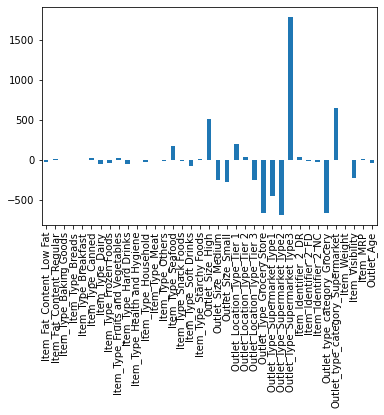

In [118]:
model=LinearRegression()
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE :  840.1640589717108
CV score:  840.7617848942924
RMSE :  1140.2661956391537
R-squared :  0.5534695624217821


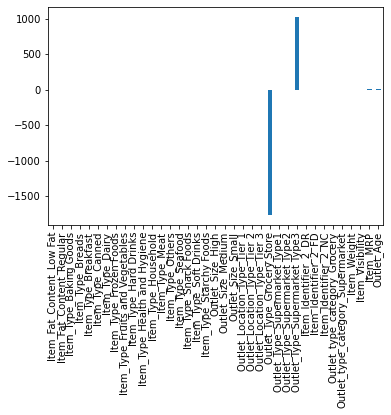

In [123]:
model = Lasso(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE :  836.05874362892
CV score:  839.4994606977986
RMSE :  1128.8982148173698
R-squared :  0.5623286269423304


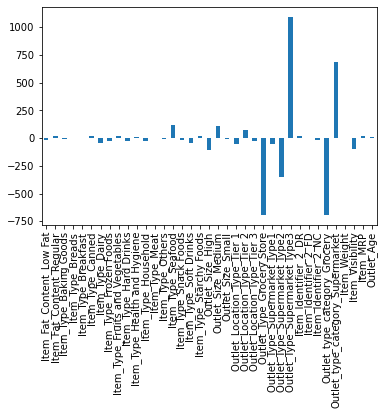

In [124]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE :  836.7815978090786
CV score:  839.3953614040933
RMSE :  1132.5815021257085
R-squared :  0.559467962864634


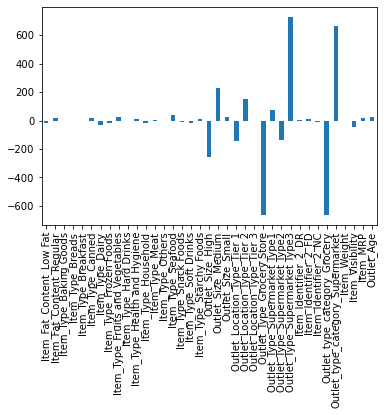

In [127]:
model = ElasticNet(alpha = 0.05, l1_ratio = 0.5)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')